---
---

<h1><center><ins>Exercise Sheet 3</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

## Exercise 1 - Root finding algorithms

**(A)** Implement the *bisection*, *secant*, *false position* and *Newton-Raphson* root finding methods, by coding your own version of these algorithms. Make sure to test your codes, checking that indeed they are able to find the root of a function (to do this, you can for example pick an analytic function that allows you test the codes and for which you can compute the roots analytically).

**(B)** Use your implementation of the 4 root finding methods (from part **A**) to compute the root of the function:

$$f(x) = e^x - 1 - x - \frac{x^2}{2}$$

in the interval $x\in[-1,2]$. For each method, print out the position of the root and the number of iterations needed to reach it.

**(C)** Discuss your results, commenting how the methods compare to one another. Which one is the fastest/slowest? Why? What is the impact of the points you selected to start your iterations?

In [ ]:
import numpy as np

# Exercise 1a and 1b
def f(x):
    return np.exp(x) - 1 - x - x**2 / 2

def df(x):
    return np.exp(x) - 1 - x

# Methods
def bisection(f, a, b, tol=1e-6, max_iter=1000):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) are wrong")
    n = 0
    while (b - a) / 2 > tol and n < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, n
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        n += 1
    return (a + b) / 2, n


def secant(f, a, b, tol=1e-6, max_iter=1000):
    n = 0
    while abs(b - a) > tol and n < max_iter:
        fa, fb = f(a), f(b)
        if fb - fa == 0:
            break
        x_new = b - fb * (b - a) / (fb - fa)
        a, b = b, x_new
        n += 1
        if abs(f(b)) < tol:
            break
    return b, n


def false_position(f, a, b, tol=1e-6, max_iter=1000):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) are wrong")
    n = 0
    c = a
    while abs(f(c)) > tol and n < max_iter:
        fa, fb = f(a), f(b)
        c = b - fb * (b - a) / (fb - fa)
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        n += 1
    return c, n


def newton_raphson(f, df, x0, tol=1e-6, max_iter=1000):
    x = x0
    n = 0
    while abs(f(x)) > tol and n < max_iter:
        dfx = df(x)
        if dfx == 0:
            print("Derivative zero")
            return None, n
        x = x - f(x) / dfx
        n += 1
    return x, n


# Values
a, b = -1, 2
x0 = 1.0
tol = 1e-6
max_iter = 1000

methods = {
    "Bisection": lambda: bisection(f, a, b, tol, max_iter),
    "Secant": lambda: secant(f, a, b, tol, max_iter),
    "False Position": lambda: false_position(f, a, b, tol, max_iter),
    "Newton-Raphson": lambda: newton_raphson(f, df, x0, tol, max_iter)
}

# Run methods
for name, method in methods.items():
    try:
        root, n = method()
        if root is None:
            print(f"{name}: Does not Converge")
            continue
        print(f"{name}:")
        print(f"  Root ≈ {root:.8f}")
        print(f"  Iterations: {n}")
        print(f"  f(root) = {f(root):.3e}")
        print(f"  Converged: {abs(f(root)) < tol}\n")
    except Exception as e:
        print(f"{name}:  Error — {e}\n")


Bisection:
  Root ≈ 0.00000763
  Iterations: 16
  f(root) = 0.000e+00
  Converged: True

Secant:
  Root ≈ -0.01682865
  Iterations: 15
  f(root) = -7.910e-07
  Converged: True

False Position:
  Root ≈ -0.05887472
  Iterations: 1000
  f(root) = -3.352e-05
  Converged: False

Newton-Raphson:
  Root ≈ 0.01321069
  Iterations: 11
  f(root) = 3.855e-07
  Converged: True



The bisection method performs surprisingly well. Depending on whether one considers the number of iterations or the accuracy of the approximated root, either bisection or Newton-Raphson comes out ahead. The secant method outperforms false-position, when minimizing the number of iterations is the priority.

## Exercise 2 - Sets of linear equations

Determine the solution to the following set of linear equations:

$$ 
\begin{cases}
5 x_1 + 3 x_2 &= 15 \\
x_1 - 4 x_2 &= -2 \ ,
\end{cases}
$$

where $x_1$ and $x_2$ are the variables of interest.

**(A)** Formulate the problem by using the matrix representation, as we saw in class, clearly defining the coefficient matrix and the vector of right-hand-side values.

**(B)** Using the appropriate built-in python functions, carry out the LU decomposition of the coefficient matrix, and print out the L and U matrices separately. Solve the set of equations and check that the solution is indeed valid.

**(C)** What is the solution to the following set of equations? 

$$ 
\begin{cases}
x_1 - 4 x_2 &= 3 \\
5 x_1 + 3 x_2 &= -7
\end{cases}
$$

Print out the solution, and motivate the steps you took to solve it.

Coefficient matrix A:
 [[ 5.  3.]
 [ 1. -4.]]

Right-hand side vector b:
 [15. -2.]

Permutation matrix P:
 [[1. 0.]
 [0. 1.]]

Lower triangular matrix L:
 [[1.  0. ]
 [0.2 1. ]]

Upper triangular matrix U:
 [[ 5.   3. ]
 [ 0.  -4.6]]

Solution x = [x1, x2]:
 [2.34782609 1.08695652]

A x = [15. -2.]
b = [15. -2.]
Check (A x ≈ b): True

Second system:
A2 =
 [[ 1. -4.]
 [ 5.  3.]]
b2 = [ 3. -7.]
Solution x' = [x1, x2]: [-0.82608696 -0.95652174]


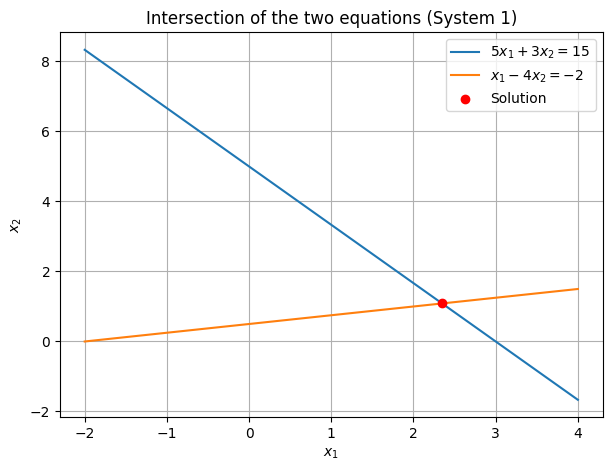

In [22]:
import numpy as np
from scipy.linalg import lu

# A
A = np.array([[5, 3],
              [1, -4]], dtype=float) # Matrix
b = np.array([15, -2], dtype=float) # Right Hand side Vector

print("Coefficient matrix A:\n", A)
print("\nRight-hand side vector b:\n", b)

# B
P, L, U = lu(A)   # A = P @ L @ U
print("\nPermutation matrix P:\n", P)
print("\nLower triangular matrix L:\n", L)
print("\nUpper triangular matrix U:\n", U)


# Forward substitution L * y = P * b
Pb = P @ b
y = np.zeros_like(b)
for i in range(len(b)):
    y[i] = Pb[i] - np.dot(L[i, :i], y[:i])

# Backward substitution U * x = y
x = np.zeros_like(b)
for i in reversed(range(len(b))):
    x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

print("\nSolution x = [x1, x2]:\n", x)

# Check result
check = A @ x
print("\nA x =", check)
print("b =", b)
print("Check (A x ≈ b):", np.allclose(check, b))

# C
A2 = np.array([[1, -4],
               [5, 3]], dtype=float)
b2 = np.array([3, -7], dtype=float)

x2 = np.linalg.solve(A2, b2)
print("\nSecond system:")
print("A2 =\n", A2)
print("b2 =", b2)
print("Solution x' = [x1, x2]:", x2)

# Visualation
import matplotlib.pyplot as plt

# Define lines 
x_vals = np.linspace(-2, 4, 200)
y1 = (15 - 5*x_vals) / 3
y2 = (x_vals + 2) / 4

plt.figure(figsize=(7,5))
plt.plot(x_vals, y1, label=r'$5x_1 + 3x_2 = 15$')
plt.plot(x_vals, y2, label=r'$x_1 - 4x_2 = -2$')
plt.scatter(x[0], x[1], color='red', zorder=5, label='Solution')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Intersection of the two equations (System 1)")
plt.legend()
plt.grid(True)
plt.show()


## Exercise 3 - Velocity dispersion estimation

The file ``omega_Cen_Sollima2009.txt`` contains a collection of measurements of line-of-sight velocities of stars in the Galactic globular cluster $\omega$ Cen (NGC 5139). The first column in the file contains the values of the velocities (in km/s), and the second column the values of the associated measurement errors (also in km/s). These data are taken from [Sollima et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009MNRAS.396.2183S/abstract).

We want to determine the mean velocity $\bar{v}$ and velocity dispersion $\sigma$ of these stars, and we do this by using a maximum likelihood estimator, following the procedure described by [Pryor and Meylan (1993)](https://ui.adsabs.harvard.edu/abs/1993ASPC...50..357P/abstract).

We start by assuming that each velocity measurement $v_i$ ($i = 1,2,...,N$), with associated error $\delta_{v,i}$, is drawn from the normal distribution:

$$
f(v_i) = \frac{1}{\sqrt{2 \pi (\sigma^2 + \delta_{v,i}^2)}} \exp\left[ - \frac{(v_i - \bar{v})^2}{2(\sigma^2 + \delta_{v,i}^2)} \right]
$$

Standard techniques for forming the likelihood of a set of $N$ velocities and finding its maximum lead to the following two equations:

$$
\sum_{i = 1}^{N} \frac{v_i}{(\sigma^2 + \delta_{v,i}^2)} - \bar{v} \sum_{i = 1}^{N} \frac{1}{(\sigma^2 + \delta_{v,i}^2)} = 0
$$

$$
\sum_{i = 1}^{N} \frac{(v_i - \bar{v})^2}{(\sigma^2 + \delta_{v,i}^2)^2} - \sum_{i = 1}^{N} \frac{1}{(\sigma^2 + \delta_{v,i}^2)} = 0
$$

These equations must be solved numerically to obtain $\bar{v}$ and $\sigma$.

**(A)** Discuss what type of problem this is, and list the possible ways (those we have seen in class, of course!) to solve it numerically with built-in python functions.

**(B)** Solve the equations above to obtain the values of the mean velocity $\bar{v}$ and velocity dispersion $\sigma$. To do this, use **all** the python built-in functions we discussed in class, and compare the results you obtain. Print out the solutions you get, and verify that they are indeed solutions of the above equations.

**(C)** Explore the input and output of the python built-in functions. Pay particular attention to the values you provide as initial guesses to compute the solution: which values break the algorithm? Which algorithm appears to be more stable?

We are dealing with a nonlinear system of two equations in two unknowns 
(vˉ,σ). This system comes from maximizing the likelihood function of the Gaussian model, so it is a maximum-likelihood estimation (MLE) problem.             Type of problem:
Nonlinear system of equations.
Equivalent to minimizing the negative log-likelihood. It can be solved with newton krylov

In [9]:
import numpy as np
from scipy.optimize import fsolve, broyden1, newton_krylov

# Load data
data = np.loadtxt("omega_Cen_Sollima2009.txt")
v = data[:, 0]      # velocities [km/s]
dv = data[:, 1]     # errors [km/s]
N = len(v)

print(f"Loaded {N} data points from omega_Cen_Sollima2009.txt\n")

# Define equations for (v̄, σ)
def equations(vars):
    vbar, sigma = vars
    if sigma <= 0:
        return np.array([np.inf, np.inf])
    term = sigma**2 + dv**2
    f1 = np.sum(v / term) - vbar * np.sum(1 / term)
    f2 = np.sum((v - vbar)**2 / term**2) - np.sum(1 / term)
    return np.array([f1, f2])

# Define negative log-likelihood function
def neg_logL(params):
    vbar, sigma = params
    if sigma <= 0:
        return np.inf
    term = sigma**2 + dv**2
    return 0.5 * np.sum(np.log(2 * np.pi * term) + (v - vbar)**2 / term)

# Initial guess
guess = [np.mean(v), np.std(v)]
print(f"Initial guess: v̄ ≈ {guess[0]:.3f}, σ ≈ {guess[1]:.3f}\n")

# Solve with multiple methods
results = {}

# fsolve
sol_fsolve = fsolve(equations, guess)
results["fsolve"] = sol_fsolve

# Broyden's method
try:
    sol_broyden = broyden1(equations, guess, f_tol=1e-8)
    results["Broyden1"] = sol_broyden
except Exception:
    results["Broyden1"] = None

# Newton-Krylov
try:
    sol_krylov = newton_krylov(equations, guess, f_tol=1e-8)
    results["Newton-Krylov"] = sol_krylov
except Exception:
    results["Newton-Krylov"] = None

# Print results
print(" Solutions for (Mean velocity v̄, Velocity dispersion σ) \n")
for method, sol in results.items():
    if sol is None:
        print(f"{method:20s}: did not converge")
    else:
        print(f"{method:20s}: v̄ = {sol[0]:.6f} km/s, σ = {sol[1]:.6f} km/s")





Loaded 318 data points from omega_Cen_Sollima2009.txt

Initial guess: v̄ ≈ 234.143, σ ≈ 9.912

 Solutions for (Mean velocity v̄, Velocity dispersion σ) 

fsolve              : v̄ = 234.145363 km/s, σ = 9.900462 km/s
Broyden1            : did not converge
Newton-Krylov       : v̄ = 234.145363 km/s, σ = 9.900462 km/s


In [21]:
import numpy as np
from scipy.optimize import fsolve, broyden1, newton_krylov

start_guesses = [[100, 5], [200, 20], [230, 30], [240, 0.5]]

# fsolve
print("fsolve results")
for guess in start_guesses:
    try:
        sol = fsolve(equations, guess)
        res = np.linalg.norm(equations(sol))
        print(f"guess = {guess} → v̄ = {sol[0]:.3f}, σ = {sol[1]:.3f}, residual = {res:.2e}")
    except Exception as e:
        print(f"guess = {guess} → failed: {e}")
print() 

# Broyden1
print("Broyden1 results")
for guess in start_guesses:
    try:
        sol = broyden1(equations, np.array(guess), f_tol=1e-6)
        res = np.linalg.norm(equations(sol))
        print(f"guess = {guess} → v̄ = {sol[0]:.3f}, σ = {sol[1]:.3f}, residual = {res:.2e}")
    except Exception as e:
        print(f"guess = {guess} → failed: {e}")
print()

# Newton-Krylov
print("Newton-Krylov results")
for guess in start_guesses:
    try:
        sol = newton_krylov(equations, np.array(guess), f_tol=1e-6)
        res = np.linalg.norm(equations(sol))
        print(f"guess = {guess} → v̄ = {sol[0]:.3f}, σ = {sol[1]:.3f}, residual = {res:.2e}")
    except Exception as e:
        print(f"guess = {guess} → failed: {e}")



fsolve results
guess = [100, 5] → v̄ = 100.000, σ = 5.000, residual = 9.10e+03
guess = [200, 20] → v̄ = 430.973, σ = 4337946696268356596722026223857862173775902472171717121806803402752.000, residual = 3.33e-129
guess = [230, 30] → v̄ = -1135.269, σ = 286992264542486735897500650509989692674852233837098005692416.000, residual = 5.29e-114
guess = [240, 0.5] → v̄ = -3850544.203, σ = 751477662636275983784903521507701257311589989063733802958848.000, residual = 2.17e-111

Broyden1 results
guess = [100, 5] → v̄ = 233.741, σ = 20485.457, residual = 8.17e-07
guess = [200, 20] → v̄ = 234.145, σ = 9.900, residual = 2.00e-09
guess = [230, 30] → v̄ = 234.527, σ = 20946.671, residual = 7.76e-07
guess = [240, 0.5] → v̄ = 233.861, σ = 17966.836, residual = 1.02e-06

Newton-Krylov results
guess = [100, 5] → failed: [100.   5.]
guess = [200, 20] → v̄ = -5008813886.540, σ = 1704848693.030, residual = 5.48e-07
guess = [230, 30] → v̄ = -839754.810, σ = 21578848.274, residual = 5.74e-07
guess = [240, 0.5] → 

/tmp/ipykernel_9010/4248215590.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(equations, guess)
/tmp/ipykernel_9010/4248215590.py:10: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  sol = fsolve(equations, guess)


It seems that Broyden is the most stable. fsolve tends to fail